## 멋쟁이 사자처럼 AI School 7 데일리 키워드 추출기
로컬에서 실행시키고 싶었지만, 구글 시트 엑세스와 konlpy 문제로 Colab으로..

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
!pip install seaborn sentence_transformers konlpy
import pandas as pd
import numpy as np
import seaborn as sns
import itertools

import gspread
import pandas as pd
from google.colab import auth
auth.authenticate_user()
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

## Sheet Load From Google Drive

In [1]:
import gspread
import pandas as pd
from google.colab import auth
auth.authenticate_user()
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

In [8]:
sheet_name = input("응답 시트 파일명 (해당 공유 폴더가 내 드라이브에 있어야함!): ")

worksheet = gc.open(sheet_name).sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows)
df.fillna("-")
df = df.iloc[:, -1][1:]

응답 시트 파일명 (해당 공유 폴더가 내 드라이브에 있어야함!): 2주차 월요일 수치형 변수의 기술통계 퀴즈 (Responses)


In [18]:
temp = df.str.split("\n")
temp = list(itertools.chain(*temp))

In [39]:
intergrated = "\n".join(temp)

In [41]:
len(intergrated)

47650

## KeyBERT
사이킷런의 `CountVectorizer`를 사용해 단어를 추출  

In [43]:
okt = Okt()

tokenized_doc = okt.pos(intergrated)
tokenized_nouns = " ".join([word[0] for word in tokenized_doc if (word[1]=="Noun" or word[1]=="Alpha")])

In [44]:
tokenized_nouns

'autoviz 스케일링 scatter plot kde 상관 계수 왜도 첨도 수치 변수 범주 변수 ANACONDA 기술 통계 seaborn 주석 추가 ctrl cmd 범주 수치 왜도 첨도 sweetviz autoviz 결 치 heatmap unique hist 빈도 kde 빈도 확률 밀도 함수 스케일링 정규화 잔차 서브 플롯 상관 계수 주석 추가 ctl cmap c olor map hue group by 기능 hist 빈도 kde 밀도 적분 때 이 값 상감 행렬 sdt 표준편차 corr hue origin col origin kind kde king hex 데이터 공통 술통 pandas profiling 전체 데이터 기술 통계 한쪽 것 확인 기술 통계 Skewness 왜도 interactions 범주 자료 수치 자료 상관관계 hist 빈도 kde 밀도 적분 때 이 값 결 치 히스토그램 시각 수치 데이터 범주 데이터 주석 커맨드 skewness 비대칭도 첨도 상관 계수 스케일링 주석 추가 컨트롤 슬래시 anaconnda pandas 프로파일링 첨도 왜도 sweetviz autoviz unique info describe 결 치 mask np triu 상 삼각 히트맵 확률 밀도 함수 kde regplot lmplot 정규화 표준화 standard scaling min max scaling mean corr 상관 분산 표준편차 잔차 주석 처리 ctrl 추상화 도구 통한 술통 구 Pandas Profiling sweetviz Autoviz car var plot distplots violinplots heatmaps pairscatter bokeh 로 시각 추상화 도구 도구 이용 기본 반복 술통 값 한번 시각 장점 자료 형태 데이터 타입 술통 값 나타남 수치 데이터 경우 막대그래프 표현 값 구분 히스토그램 수치 데이터 범위 그림 x 축 범주 데이터 y 축 수치 데이터 경우 수치 데이터 y 축값 평균 표현 추상화 도구 사용 단점 가장 이유 용량 데이터 사용 단점 직접 

In [45]:
n_gram_range = (1, 1)

count = CountVectorizer(ngram_range=n_gram_range).fit([tokenized_nouns])
candidates = count.get_feature_names_out()

In [47]:
model = SentenceTransformer('sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens')
doc_embedding = model.encode([intergrated])
candidate_embeddings = model.encode(candidates)

Downloading:   0%|          | 0.00/574 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.06k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/731 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/527 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [50]:
top_n = 20
distances = cosine_similarity(doc_embedding, candidate_embeddings)
keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]
keywords

['matplotlib',
 '히트맵',
 'relplot',
 '하삼각행렬',
 'profiling',
 'correaltions',
 '단축키',
 'releplot',
 '컨드롤',
 'replot',
 'scatterplot',
 'corr',
 'profinling',
 'kurtosis',
 '프로파일링',
 'astype',
 'autiviz',
 'violingplot',
 'regplot',
 'residplot']

## Word Cloud

In [67]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

In [106]:
wc = WordCloud(
    font_path = "/content/drive/MyDrive/malgun.ttf",
    width=500,
    height=500,
    max_font_size=250,
    scale=1.2,
    background_color="black"
).generate_from_frequencies(Counter(str(tokenized_nouns).split(" ")))

(-0.5, 599.5, 599.5, -0.5)

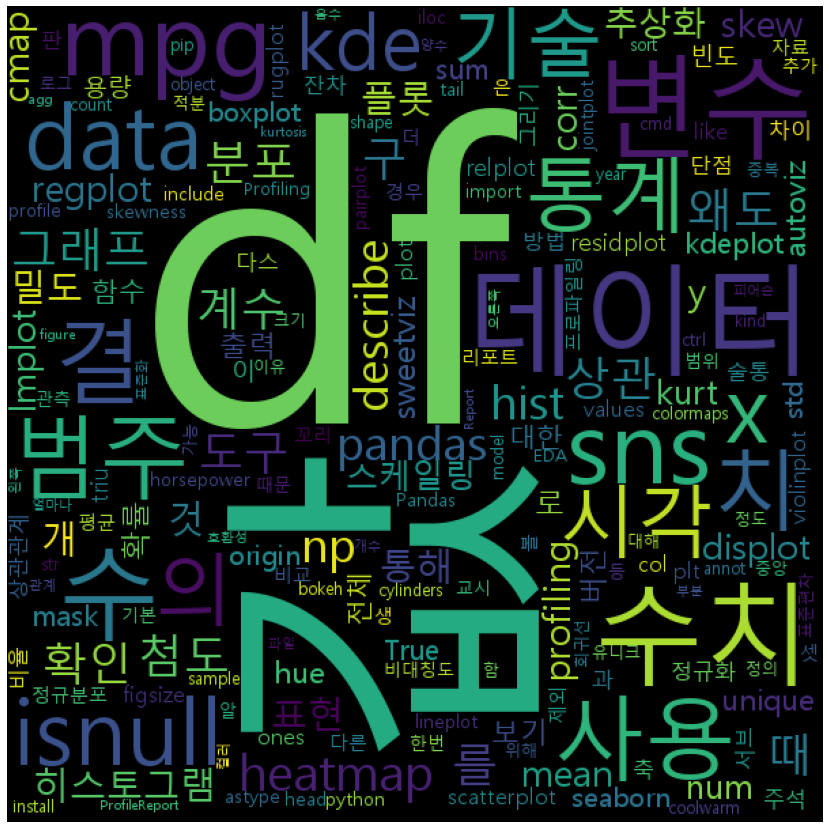

In [107]:
plt.figure(figsize=(15, 15))
plt.imshow(wc);
plt.axis("off")

## MSS(Max Sum Similarity)
후보 간의 유사성을 최소화하면서 문서와의 후보 유사성을 극대화  
-> `n_gram`이 1이라서 너무 오래 걸림 + 다양화 할 필요가 없을꺼 같아서 기각

In [51]:
def max_sum_sim(doc_embedding, candidate_embeddings, words, top_n, nr_candidates):
    # 문서와 각 키워드 간의 유사도
    distances = cosine_similarity(doc_embedding, candidate_embeddings)
    # 각 키워드들 간의 유사도
    distances_candidates = cosine_similarity(candidate_embeddings, candidate_embeddings)
    # 코사인 유사도에 기반해, 키워드들 중 상위 top_n개의 단어만 선택
    words_idx = list(distances.argsort()[0][-nr_candidates:])
    words_vals = [candidates[index] for index in words_idx]
    distances_candidates = distances_candidates[np.ix_(words_idx, words_idx)]

    # 각 키워드들 중에서 가장 덜 유사한 키워드들간의 조합을 계산
    min_sim = np.inf
    candidate = None
    for combination in itertools.combinations(range(len(words_idx)), top_n):
        sim = sum([distances_candidates[i][j] for i in combination for j in combination if i!=j])
        if sim<min_sim:
            candidate = combination
            min_sim = sim

    return [words_vals[idx] for idx in candidate]

In [53]:
max_sum_sim(doc_embedding, candidate_embeddings, candidates, top_n=20, nr_candidates=30)

['합계',
 '분포도',
 'rc',
 'subplot',
 'distplots',
 'format',
 'matplotlib',
 '히트맵',
 '하삼각행렬',
 'profiling',
 'correaltions',
 '컨드롤',
 'scatterplot',
 'corr',
 'profinling',
 '프로파일링',
 'astype',
 'autiviz',
 'violingplot',
 'regplot']